# Работа 3

## Задача со стрельбой по мишени

https://habr.com/ru/articles/759994/

#### В начальный момент времени снаряд стартует из точки $(x_s, y)$ со скоростью $U$. Мишень движется по закону $(x(t), y(t))$. Реализовать поиск направления стрельбы в начальный момент времени чтобы снаряд попал в мишень:

$$
F(t) = | \sqrt{(x(t) - x_s)^2 + (y(t) - y_s)^2} - Ut | \rightarrow \min
$$

1. Для выбранного закона движения мишени визуализировать функцию $F(t)$ и найти ее глобальный минимум

2. Визуализировать попадание при помощи тестового проекта:
   https://github.com/obraz89/TargetShooting


In [3]:
# Подключаем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

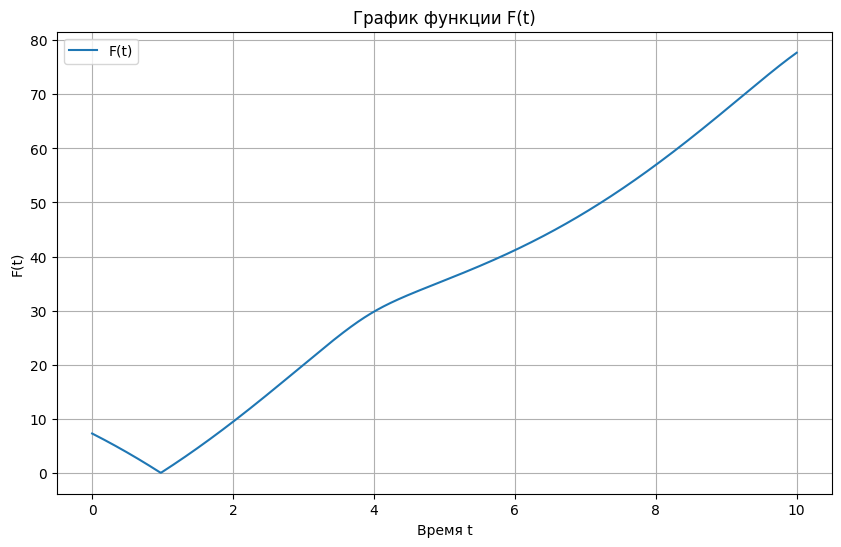

Найденный минимум: t = 0.9745


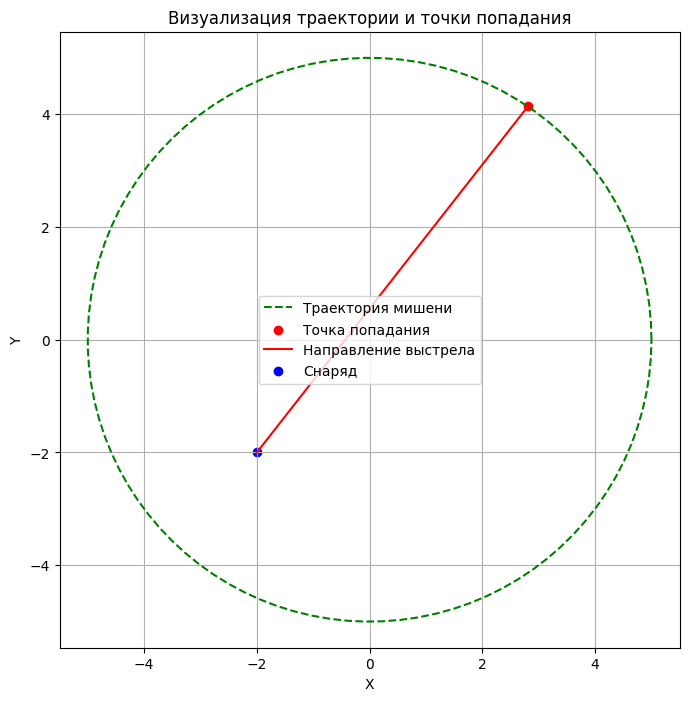

In [4]:
# Параметры задачи
xs, ys = -2, -2  # Начальная позиция снаряда
U = 8  # Скорость снаряда


# Закон движения мишени (равномерное движение по окружности)
def target_position(t):
    radius = 5
    angular_velocity = 1
    x = radius * np.cos(angular_velocity * t)
    y = radius * np.sin(angular_velocity * t)
    return x, y


# Функция для минимизации
def F(t):
    x_t, y_t = target_position(t)
    distance = np.sqrt((x_t - xs) ** 2 + (y_t - ys) ** 2)
    return np.abs(distance - U * t)


# Визуализация функции F(t)
t_values = np.linspace(0, 10, 1000)
F_values = [F(t) for t in t_values]

plt.figure(figsize=(10, 6))
plt.plot(t_values, F_values, label="F(t)")
plt.xlabel("Время t")
plt.ylabel("F(t)")
plt.title("График функции F(t)")
plt.grid(True)
plt.legend()
plt.show()

# Поиск глобального минимума
result = minimize(F, x0=1.0, bounds=[(0, 10)], method="L-BFGS-B")
min_time = result.x[0]
min_value = result.fun

print(f"Найденный минимум: t = {min_time:.4f}")

# Визуализация траектории мишени и точки выстрела
x_target, y_target = target_position(min_time)
plt.figure(figsize=(8, 8))
angles = np.linspace(0, 2 * np.pi, 100)
radius = 5
x_circle = radius * np.cos(angles)
y_circle = radius * np.sin(angles)
plt.plot(x_circle, y_circle, "g--", label="Траектория мишени")
plt.scatter(x_target, y_target, color="red", label="Точка попадания")
plt.plot([xs, x_target], [ys, y_target], "r-", label="Направление выстрела")
plt.scatter(xs, ys, color="blue", label="Снаряд")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Визуализация траектории и точки попадания")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()